## Data

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


(200, 200, 3)


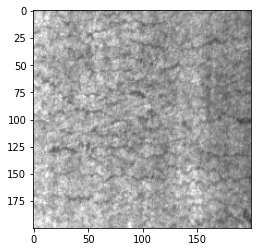

In [4]:
IMG_PATH = "../dataset/crazing/crazing_1.jpg"
img = mpimg.imread(IMG_PATH)
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

In [5]:
def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

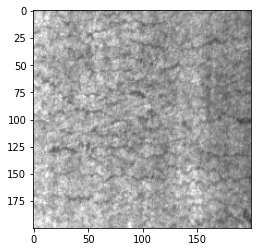

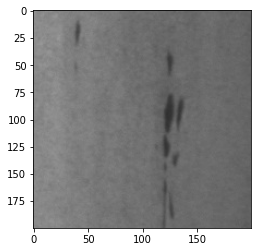

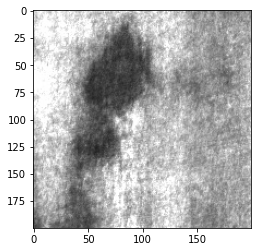

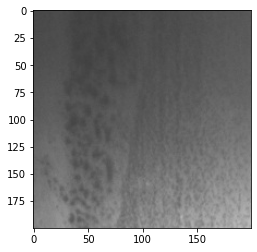

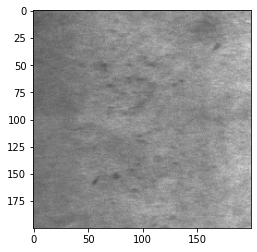

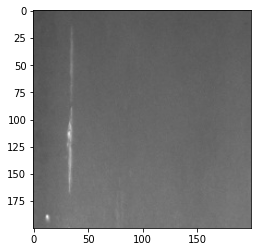

In [6]:
sample_images_list = ["../dataset/crazing/crazing_1.jpg",
                      "../dataset/inclusion/inclusion_1.jpg",
                      "../dataset/patches/patches_1.jpg",
                      "../dataset/pitted_surface/pitted_surface_1.jpg",
                      "../dataset/rolled-in_scale/rolled-in_scale_1.jpg",
                      "../dataset/scratches/scratches_1.jpg"]

for image in sample_images_list:
    process(image)

# Classification with SVM(SVC)

## Preparation Dataset

In [7]:
import os
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


In [8]:
DATA_PATH = "../dataset"

categories=["crazing","inclusion","patches","pitted_surface","rolled-in_scale","scratches"]

flat_data_list = list()
target_list = list()

for i in categories:
    print("loading... category : {}".format(i))
    path = os.path.join(DATA_PATH,i)

    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (100,100,3))
        flat_data_list.append(img_resized.flatten())
        target_list.append(categories.index(i))
    
    print("loaded category: {} successfully".format(i))

flat_data = np.array(flat_data_list)
target = np.array(target_list)

df = pd.DataFrame(flat_data)
df['Target'] = target
x = df.iloc[:,:-1] #input data
y = df.iloc[:,-1] #output data





loading... category : crazing
loaded category: crazing successfully
loading... category : inclusion
loaded category: inclusion successfully
loading... category : patches
loaded category: patches successfully
loading... category : pitted_surface
loaded category: pitted_surface successfully
loading... category : rolled-in_scale
loaded category: rolled-in_scale successfully
loading... category : scratches
loaded category: scratches successfully


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.421569,0.421569,0.421569,0.475490,0.475490,0.475490,0.522549,0.522549,0.522549,0.505882,...,0.200980,0.200980,0.200980,0.200980,0.200980,0.200980,0.238235,0.238235,0.238235,0
1,0.447059,0.447059,0.447059,0.452941,0.452941,0.452941,0.455882,0.455882,0.455882,0.527451,...,0.816667,0.816667,0.816667,0.791176,0.791176,0.791176,0.814706,0.814706,0.814706,0
2,0.664706,0.664706,0.664706,0.605882,0.605882,0.605882,0.592157,0.592157,0.592157,0.626471,...,0.587255,0.587255,0.587255,0.607843,0.607843,0.607843,0.617647,0.617647,0.617647,0
3,0.587255,0.587255,0.587255,0.645098,0.645098,0.645098,0.591176,0.591176,0.591176,0.538235,...,0.416667,0.416667,0.416667,0.369608,0.369608,0.369608,0.377451,0.377451,0.377451,0
4,0.626471,0.626471,0.626471,0.565686,0.565686,0.565686,0.589216,0.589216,0.589216,0.575490,...,0.688235,0.688235,0.688235,0.719608,0.719608,0.719608,0.651961,0.651961,0.651961,0


## Train and Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


## GridSearchCV - Try at HOME 

In [10]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

svc = svm.SVC(probability=True)

model=GridSearchCV(svc, param_grid)

## Model

In [11]:
from sklearn import svm

svc = svm.SVC(probability=True)


## Model Train

In [12]:
svc.fit(x_train, y_train)

print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given images


## Model Test

In [20]:
from sklearn.metrics import accuracy_score

y_pred=svc.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 73.33333333333333% accurate


## Metrics

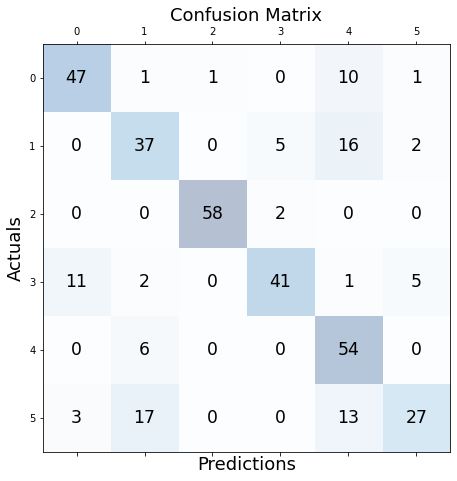

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        60
           1       0.59      0.62      0.60        60
           2       0.98      0.97      0.97        60
           3       0.85      0.68      0.76        60
           4       0.57      0.90      0.70        60
           5       0.77      0.45      0.57        60

    accuracy                           0.73       360
   macro avg       0.76      0.73      0.73       360
weighted avg       0.76      0.73      0.73       360



![Metrics](../images/1.png)

![Metrics2](../images/2.png)

# Classification with Deep Learning

In [7]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [8]:
print(tf.__version__)

2.6.0


In [9]:
DATA_PATH = "../dataset"

data_dir = pathlib.Path(DATA_PATH)

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1800


## Create Dataset

In [11]:
batch_size = 8
img_height = 100
img_width = 100 

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1800 files belonging to 6 classes.
Using 1440 files for training.


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1800 files belonging to 6 classes.
Using 360 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 100, 100, 3)
(8,)


### Shuffle Dataset

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Normalize Dataset

In [19]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.22352943 0.9450981


## ANN Model

### Create Model

In [24]:
num_classes = 6 

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the Model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              30001000  
_________________________________________________________________
dense_3 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 30,129,902
Trainable params: 30,129,902
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [27]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
180/180 [==============================] - 27s 146ms/step - loss: 7.9284 - accuracy: 0.1951 - val_loss: 1.8359 - val_accuracy: 0.1944
Epoch 2/10
180/180 [==============================] - 27s 147ms/step - loss: 2.2710 - accuracy: 0.2542 - val_loss: 2.3436 - val_accuracy: 0.3056
Epoch 3/10
180/180 [==============================] - 26s 147ms/step - loss: 1.9217 - accuracy: 0.2347 - val_loss: 2.0104 - val_accuracy: 0.2944
Epoch 4/10
180/180 [==============================] - 25s 138ms/step - loss: 1.7365 - accuracy: 0.2715 - val_loss: 1.6694 - val_accuracy: 0.3444
Epoch 5/10
180/180 [==============================] - 26s 146ms/step - loss: 1.6314 - accuracy: 0.2924 - val_loss: 1.5706 - val_accuracy: 0.3194
Epoch 6/10
180/180 [==============================] - 26s 147ms/step - loss: 1.5785 - accuracy: 0.3069 - val_loss: 1.5017 - val_accuracy: 0.3222
Epoch 7/10
180/180 [==============================] - 25s 140ms/step - loss: 1.5429 - accuracy: 0.3306 - val_loss: 1.5322 - val_ac

## Visualization

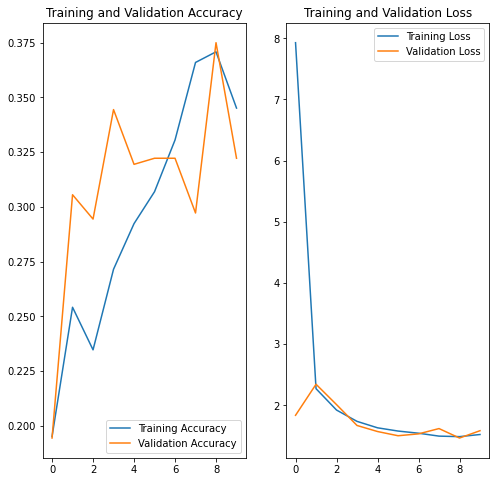

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## CNN Model

In [62]:
num_classes = 6

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)       

In [65]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
180/180 [==============================] - 6s 33ms/step - loss: 1.2915 - accuracy: 0.4854 - val_loss: 0.5475 - val_accuracy: 0.8444
Epoch 2/20
180/180 [==============================] - 6s 31ms/step - loss: 0.6312 - accuracy: 0.7854 - val_loss: 0.4160 - val_accuracy: 0.8917
Epoch 3/20
180/180 [==============================] - 6s 32ms/step - loss: 0.3500 - accuracy: 0.8861 - val_loss: 0.3596 - val_accuracy: 0.9000
Epoch 4/20
180/180 [==============================] - 5s 30ms/step - loss: 0.2581 - accuracy: 0.9160 - val_loss: 0.1882 - val_accuracy: 0.9361
Epoch 5/20
180/180 [==============================] - 6s 33ms/step - loss: 0.2547 - accuracy: 0.9194 - val_loss: 0.8225 - val_accuracy: 0.7861
Epoch 6/20
180/180 [==============================] - 6s 31ms/step - loss: 0.2356 - accuracy: 0.9285 - val_loss: 0.2143 - val_accuracy: 0.9333
Epoch 7/20
180/180 [==============================] - 6s 32ms/step - loss: 0.1315 - accuracy: 0.9563 - val_loss: 0.1972 - val_accuracy: 0.9167

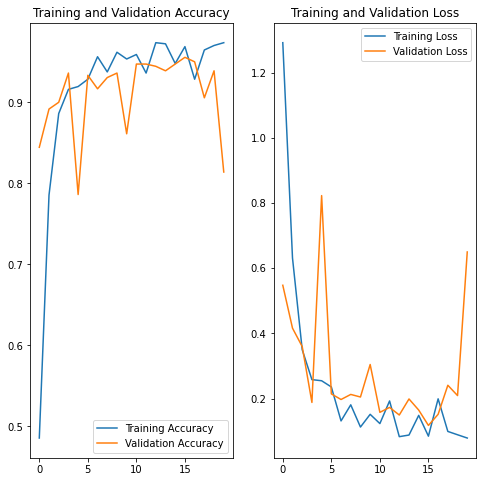

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()